<a href="https://colab.research.google.com/github/dsrojo10/Learning_AI/blob/main/ejemplo1/red_neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red neuronal

El ejercicio se trata de convertir de grados *Celsius* a grados *Fahrenheit*

* Programación regular: para convertir de C a F de forma convencional se usa la formula (la cual se trata de una ec. de la recta y = mx + b)

In [1]:
def function(C):
  F = C * 1.8 + 32
  return F

In [2]:
print(function(100.0))

212.0


* Aprendizaje automático: (imaginemos que no conocemos la formula)

## 1 capa

In [3]:
# librerias a emplear
import tensorflow as tf
import numpy as np

In [4]:
# datos para entrenar el modelo (ejemplos correctos de conversion de C a F)
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

Ademas de usar tensorflow para la red usaremos el framework **Keras**, que nos permite crear una red neuronal de una manera simple, en Keras podemos especificar las dos capas (entrada y salida) por separado, o nos podemos ahorrar un paso y especificar solo la capa de salida

In [5]:
# se genera red neuronal
# en este caso tenemos una red densa con 1 neurona (units=1) y 1 salida (input_shape=[1])
capa = tf.keras.layers.Dense(units=1, input_shape=[1])

# se usa el modelo secuencial
modelo = tf.keras.Sequential([capa])

* Densa -> Tiene conexiones desde cada neurona hacia todas las neuronas de la siguiente capa.
* No Densa -> ...

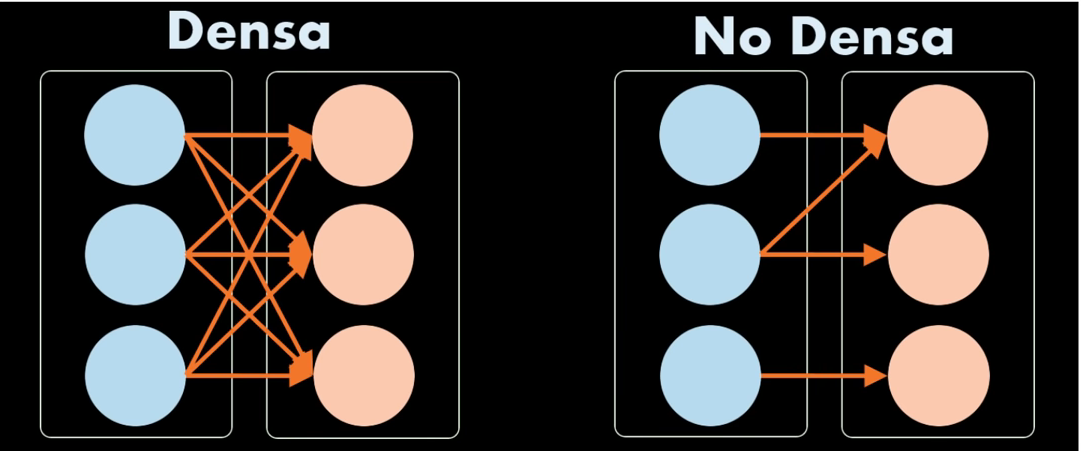

* Optmizador Adam -> con valor 0.1 (esta es la tasa de aprendizaje)
núm peq cambios peq & núm grandes cambios grandes

* Función de perdida -> mean_squared_error (error cuadratico medio)

In [6]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss = 'mean_squared_error'
)

In [7]:
# se entrena el modelo (epochs -> numero de vueltas, verbose=False para evitar imprimir basura)
print("Comenzando el entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado")

Comenzando el entrenamiento...
Modelo entrenado


Se grafican los resultados, se puede observar que despues de 400 se estabiliza en ese valor, ya no mejora más.

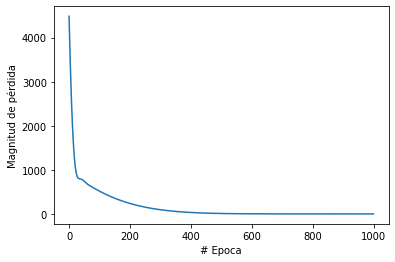

In [8]:
import matplotlib.pyplot as plt
plt.xlabel('# Epoca')
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [9]:
print("Hagamos una predicción!")
resultado = modelo.predict([100.0])
print("El resultado es " + str(resultado) + "Fahrenheit.")

Hagamos una predicción!
1/1 [==============================] - 0s 71ms/step
El resultado es [[211.74237]]Fahrenheit.


In [10]:
print("Variable internas del modelo")
print(capa.get_weights())

Variable internas del modelo
[array([[1.798257]], dtype=float32), array([31.916666], dtype=float32)]


Acá podemos ver como esta tomando de peso *1.798* en la formula es 1.8 y para el valor de ajuste *31.916* en la formula es 32, se puede observar que el modelo funciona bien.

## 2 capas intermedias con 3 neuronas

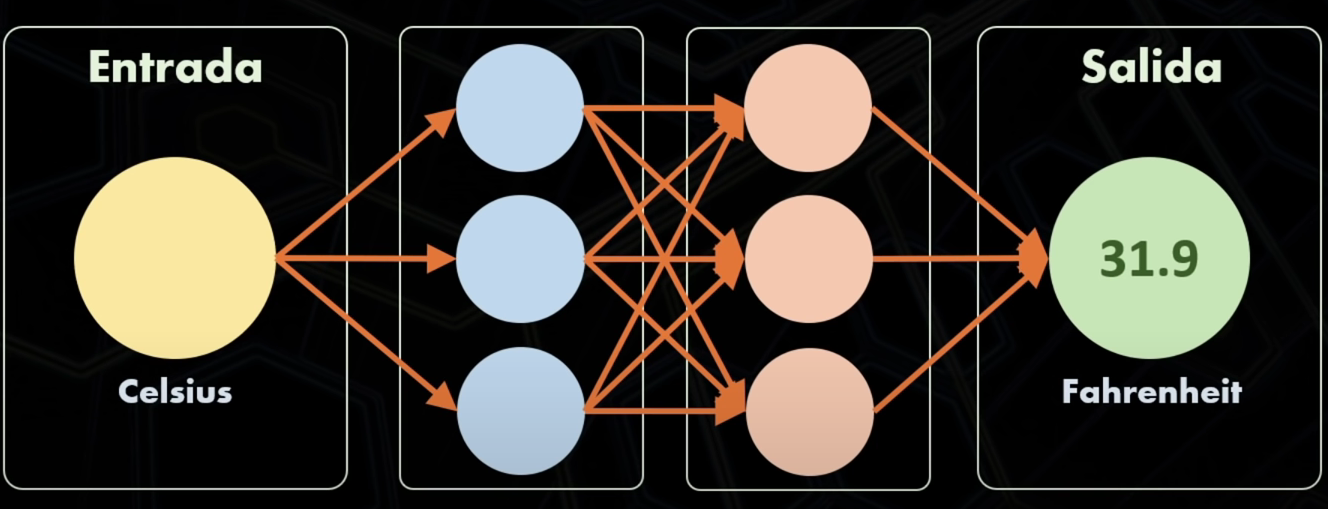

In [11]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [14]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss = 'mean_squared_error'
)

In [15]:
# se entrena el modelo (epochs -> numero de vueltas, verbose=False para evitar imprimir basura)
print("Comenzando el entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado")

Comenzando el entrenamiento...
Modelo entrenado


Se grafican los resultados, se puede observar que despues de 400 se estabiliza en ese valor, ya no mejora más.

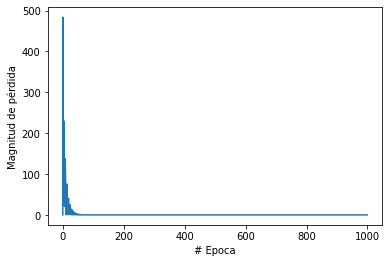

In [16]:
import matplotlib.pyplot as plt
plt.xlabel('# Epoca')
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [17]:
print("Hagamos una predicción!")
resultado = modelo.predict([100.0])
print("El resultado es " + str(resultado) + "Fahrenheit.")

Hagamos una predicción!
1/1 [==============================] - 0s 53ms/step
El resultado es [[211.74742]]Fahrenheit.


In [18]:
print("Variable internas del modelo")
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variable internas del modelo
[array([[ 0.04953277, -0.28640243, -0.56524026]], dtype=float32), array([-2.9831202, -3.3681712, -3.4099758], dtype=float32)]
[array([[-0.08557055, -0.36283502, -0.42532828],
       [ 0.3352634 ,  0.75395393, -0.82621104],
       [-0.7298744 ,  0.60336816, -0.42252845]], dtype=float32), array([ 3.5526557, -3.5820181,  3.6095397], dtype=float32)]
[array([[ 1.1222647],
       [-1.470905 ],
       [ 1.3243374]], dtype=float32), array([3.6607153], dtype=float32)]


Se observa que el resultado se acerca cada vez más a 212 que es el valor esperado.